In [1]:
# Imported dependencies 
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Imported more dependencies 
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
# Using "desc" in the order by to specify descending order, so that the latest date will be listed first 
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

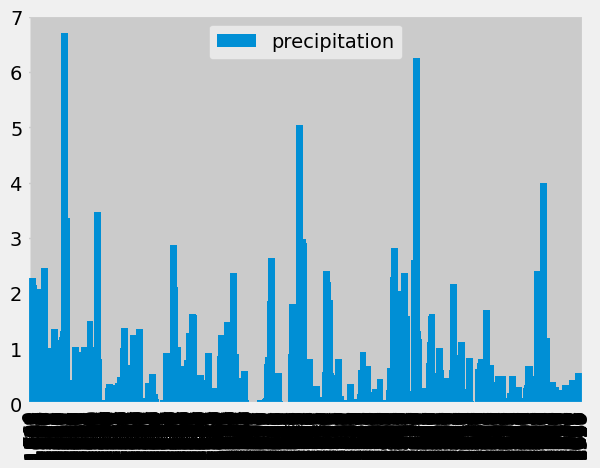

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
# Most recent data point calculated in the earlier cell ('2017-08-23',)

# Calculate the date one year from the last date in data set.
# One year from 2017-08-23 is 2016-08-23
dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
# Using sel short for select, to define what columns to pull out of the table. Want both date and precipitation
sel = [Measurement.date, Measurement.prcp]

# Performing the actual query 
prcp_by_date = session.query(*sel).filter(Measurement.date <= '2017-08-23').\
filter(Measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_by_date, columns=['date', 'precipitation'])

# Sort the dataframe by date
prcp_df.sort_values(by='date', inplace=True)

# Getting rid of any NaNs
prcp_df = prcp_df.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot.bar(width=25)
plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [ ]:
# Close Session
session.close()